In [1]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
import phate

In [3]:
os.chdir('..')
import manifold_methods
import plotting
import mappings
import data_loader

In [4]:
exp_path = '/lustre06/project/6065672/shared/DietNet/1KGB_POP24/1KGP/WGS30X_V1/oldnow/MattsPlace'
fname = '1000G.2504_WGS30x.GSA17k_MHI.intersectGSA.miss10perc.maf0.05.pruned.autosomes.noHLA.phased_imputed_V1.hdf5'

In [5]:
inputs, class_labels, samples, snp_names, class_label_names = data_loader.load_data_1000G(os.path.join(exp_path, fname))
label_with_names, label_with_superpop_names = data_loader.preprocess_labels_1000G(class_labels, class_label_names)

In [6]:
pca_obj = sklearn.decomposition.PCA(n_components=100, random_state=42)
pca_input = pca_obj.fit_transform(inputs)

Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.11 seconds.
  Calculating KMeans...
  Calculated KMeans in 1.23 seconds.
Calculated landmark operator in 1.88 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.02 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.72 seconds.
Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD 

/tmp/ipykernel_3168819/2180290817.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.12 seconds.
  Calculating KMeans...
  Calculated KMeans in 1.29 seconds.
Calculated landmark operator in 1.95 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.84 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.74 seconds.
Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...


/tmp/ipykernel_3168819/2180290817.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.11 seconds.
  Calculating KMeans...
  Calculated KMeans in 0.96 seconds.
Calculated landmark operator in 1.62 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.04 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.73 seconds.


/tmp/ipykernel_3168819/2180290817.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


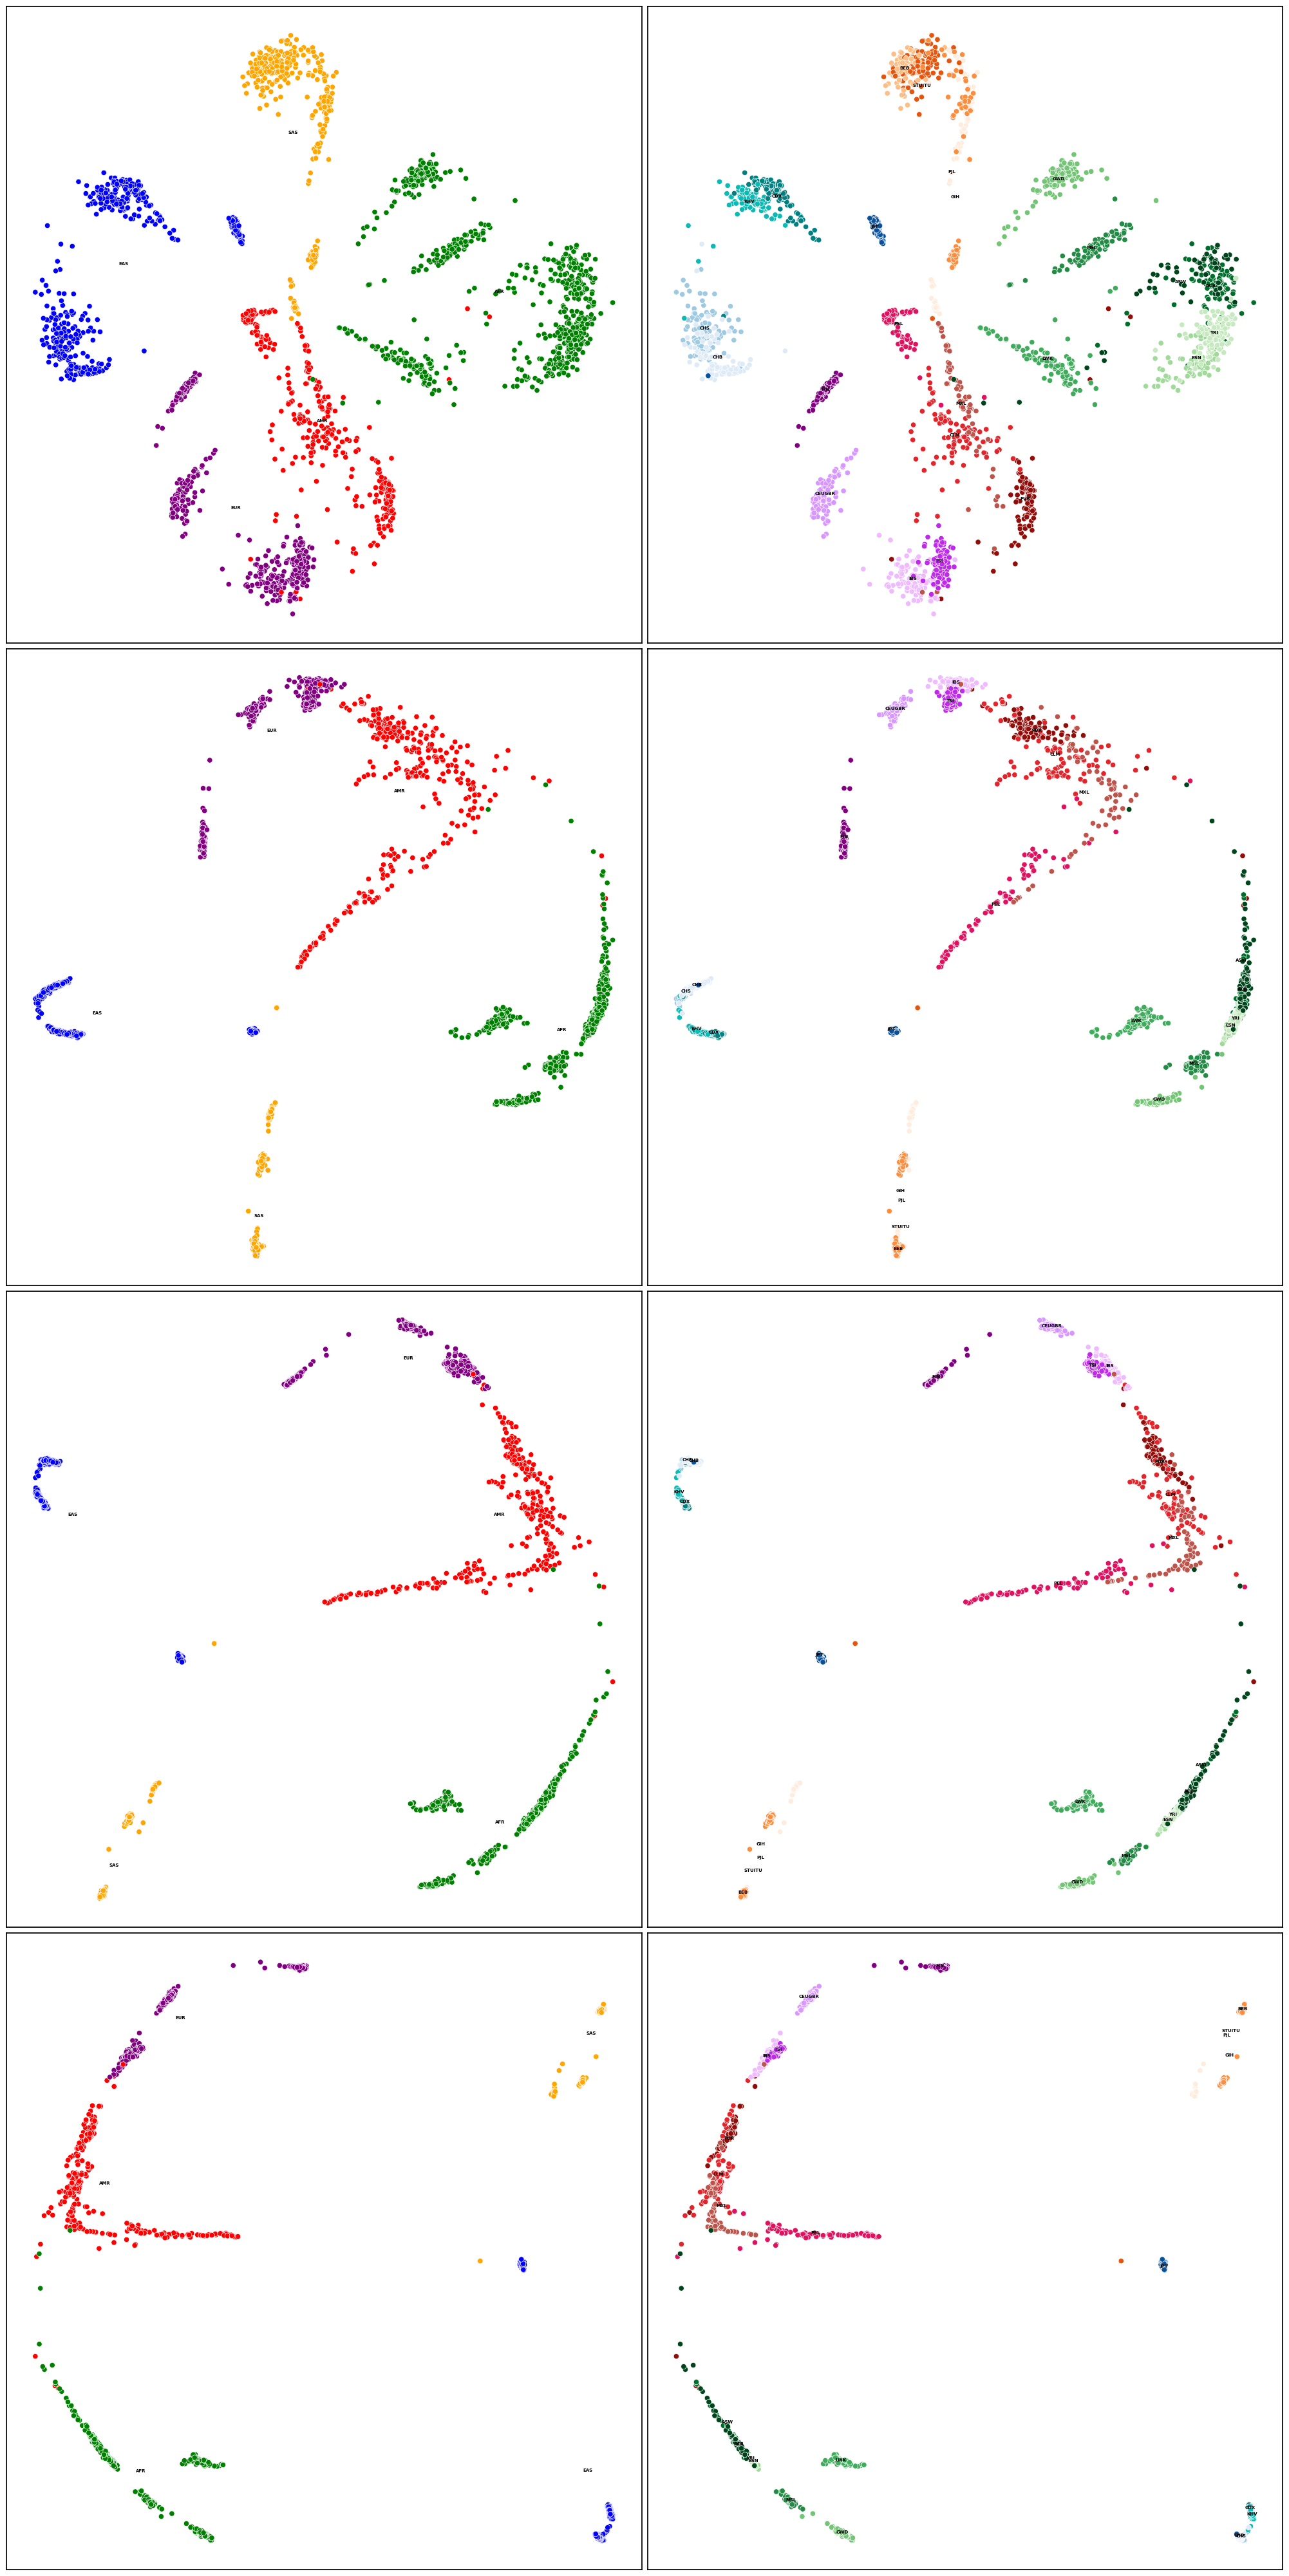

In [8]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20,40))
for i, t in enumerate((1,5,10,20)):
    # initial 2D phate embedding
    phate_operator_2d = phate.PHATE(random_state=42, 
                                      n_components=2, 
                                      knn=5, 
                                      n_pca=None,
                                      decay=60,
                                      t=t,
                                      gamma=1.)
    phate_operator_2d.fit(pca_input)
    phate_emb_2d = phate_operator_2d.transform()

    plotting.plot_embeddings(phate_emb_2d, 
                             label_with_superpop_names, 
                             None,
                             mappings.pop_pallette_1000G_coarse,
                             mappings.label_order_1000G_coarse,
                             True,
                             ax[i, 0])
    plotting.plot_embeddings(phate_emb_2d, 
                             label_with_names,
                             None,
                             mappings.pop_pallette_1000G_fine,
                             mappings.label_order_1000G_fine,
                             True,
                             ax[i, 1])
plt.tight_layout()

## Admix Ratios

In [9]:
def load_admix_ratio(sample_ids_path, admix_ratios_path, samples, labels):
    admix_labels = np.zeros([len(samples), 3])

    sample_ids = pd.read_csv(sample_ids_path, sep=' ', header=None)
    admix_ratios = pd.read_csv(admix_ratios_path, sep=' ', header=None)

    admix_df = pd.concat([admix_ratios, sample_ids], axis=1)
    admix_df.columns = ['admix 1', 'admix 2', 'admix 3' , 'sample id']

    matching_indices = np.array([np.where(admix_df['sample id'][j] == samples)[0][0] if len(np.where(admix_df['sample id'][j] == samples)[0]) > 0 else -1 for j in range(len(admix_df))])
    for i, idx in enumerate(matching_indices):
        if idx != -1:
            admix_labels[idx] = admix_df.iloc[i].values[:3]

    # color in all EUR or AFR individuals as 1
    admix_labels_inc_EURAFR = admix_labels
    admix_labels_inc_EURAFR[labels == 'EUR', 2] = 1
    admix_labels_inc_EURAFR[labels == 'AFR', 0] = 1

    return admix_labels, admix_labels_inc_EURAFR

In [10]:
data_path = '/lustre07/scratch/sciclun4/data/1000G/phate_genetics/MyAdmix'
sample_ids_path = os.path.join(data_path, 'output_ids.txt')
admix_ratios_path = os.path.join(data_path, 'AMR_ACB_ASW.3.Q')

admix_labels, admix_labels_inc_EURAFR = load_admix_ratio(sample_ids_path, 
                                                         admix_ratios_path,
                                                         samples,
                                                         class_labels)

Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.11 seconds.
  Calculating KMeans...
  Calculated KMeans in 0.96 seconds.
Calculated landmark operator in 1.63 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.02 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.73 seconds.
Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD 

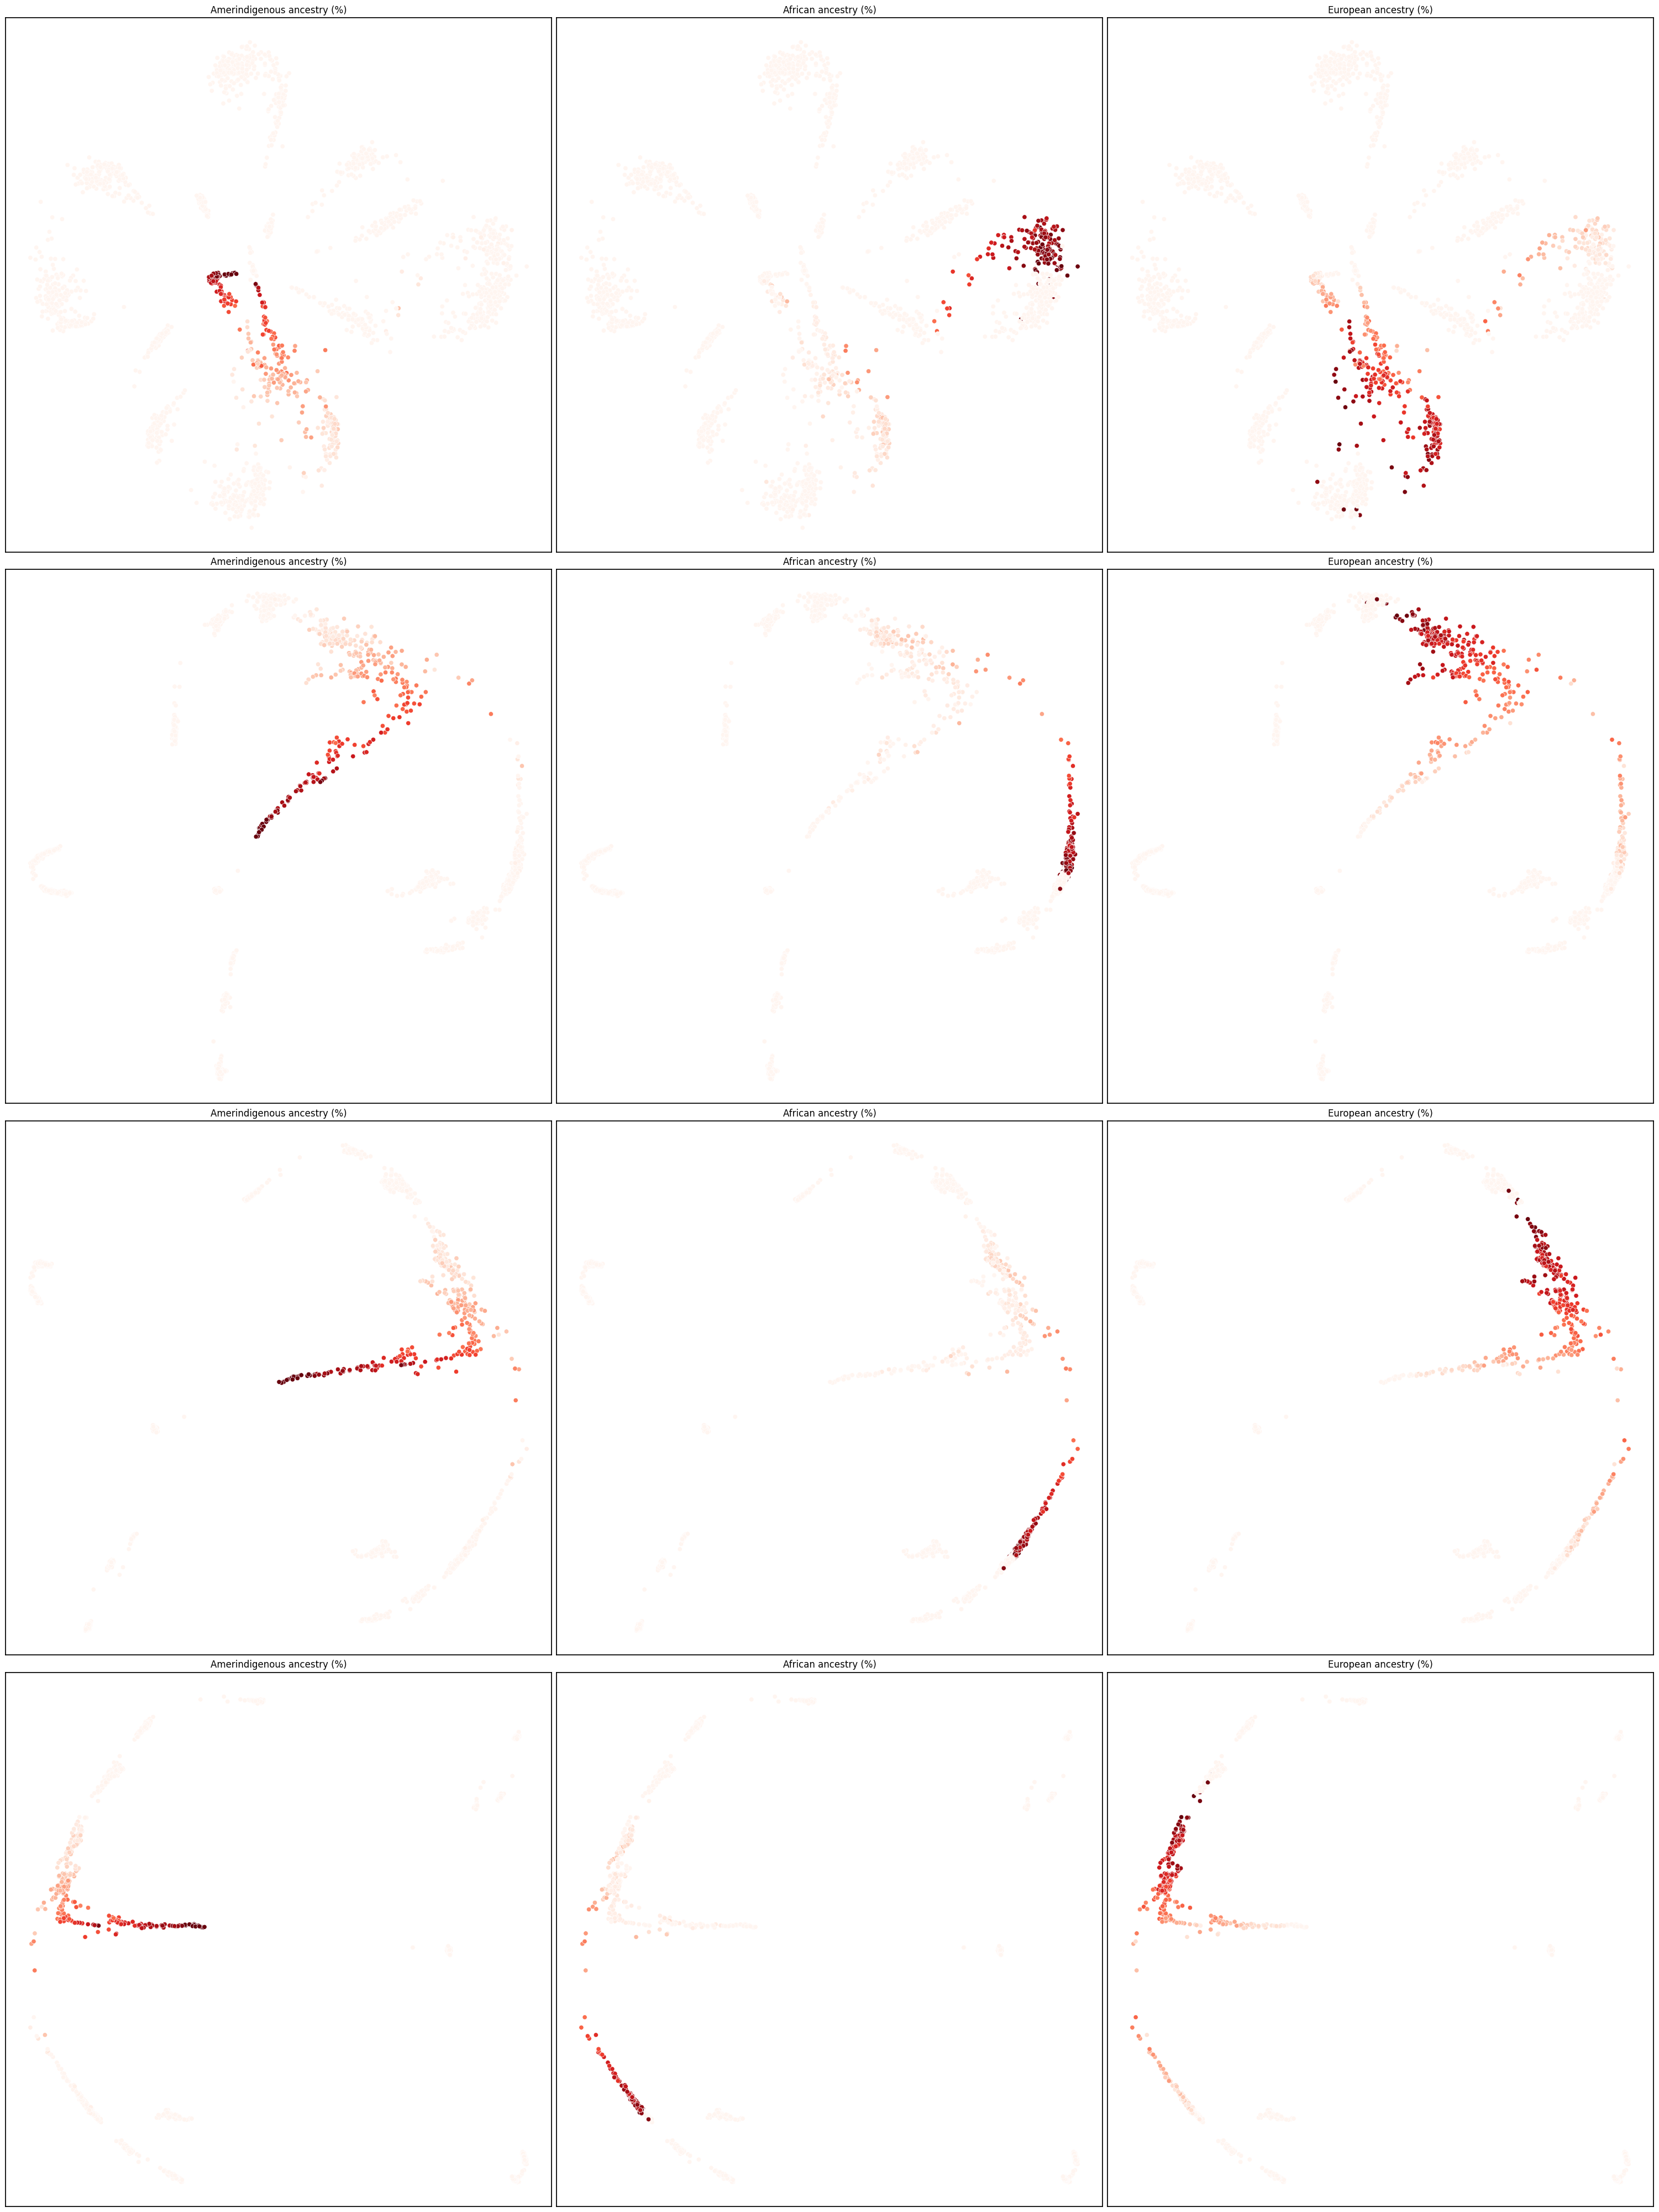

In [11]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(30,40))
for i, t in enumerate((1,5,10,20)):
    # initial 2D phate embedding
    phate_operator_2d = phate.PHATE(random_state=42, 
                                      n_components=2, 
                                      knn=5, 
                                      n_pca=None,
                                      decay=60,
                                      t=t,
                                      gamma=1.)
    phate_operator_2d.fit(pca_input)
    phate_emb_2d = phate_operator_2d.transform()

    plotting.plot_embeddings(phate_emb_2d, 
                             admix_labels_inc_EURAFR[:,1],
                             None,
                             None,
                             None,
                             True,
                             ax[i, 0])
    ax[i, 0].set_title("Amerindigenous ancestry (%)", fontsize=12)
    plotting.plot_embeddings(phate_emb_2d, 
                             admix_labels_inc_EURAFR[:,0],
                             None,
                             None,
                             None,
                             True,
                             ax[i, 1])
    ax[i, 1].set_title("African ancestry (%)", fontsize=12)
    plotting.plot_embeddings(phate_emb_2d, 
                             admix_labels_inc_EURAFR[:,2],
                             None,
                             None,
                             None,
                             True,
                             ax[i, 2])
    ax[i, 2].set_title("European ancestry (%)", fontsize=12)

plt.tight_layout()